In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [70]:
basePath = 'data//51st Bisons vs CNF Rd 1//Plane//'

A1 = pd.read_csv(basePath+'Allies_PlaneId_10C.csv')
A1.set_index('Unix time', inplace=True, drop=False)
A2 = pd.read_csv(basePath+'Allies_PlaneId_10F.csv')
A2.set_index('Unix time', inplace=True, drop=False)
A3 = pd.read_csv(basePath+'Allies_PlaneId_105.csv')
A3.set_index('Unix time', inplace=True, drop=False)
A4 = pd.read_csv(basePath+'Allies_PlaneId_106.csv')
A4.set_index('Unix time', inplace=True, drop=False)
A5 = pd.read_csv(basePath+'Allies_PlaneId_108.csv')
A5.set_index('Unix time', inplace=True, drop=False)
A6 = pd.read_csv(basePath+'Allies_PlaneId_109.csv')
A6.set_index('Unix time', inplace=True, drop=False)

E1 = pd.read_csv(basePath+'Enemies_PlaneId_10A.csv')
E1.set_index('Unix time', inplace=True, drop=False)
E2 = pd.read_csv(basePath+'Enemies_PlaneId_10B.csv')
E2.set_index('Unix time', inplace=True, drop=False)
E3 = pd.read_csv(basePath+'Enemies_PlaneId_10E.csv')
E3.set_index('Unix time', inplace=True, drop=False)
E4 = pd.read_csv(basePath+'Enemies_PlaneId_104.csv')
E4.set_index('Unix time', inplace=True, drop=False)
E5 = pd.read_csv(basePath+'Enemies_PlaneId_107.csv')
E5.set_index('Unix time', inplace=True, drop=False)
E6 = pd.read_csv(basePath+'Enemies_PlaneId_110.csv')
E6.set_index('Unix time', inplace=True, drop=False)

In [ ]:
A_list = [A1, A2, A3, A4, A5, A6]
E_list = [E1, E2, E3, E4, E5, E6]
T_list = []
#! 下面这行范围根据印其灵的数据来设置
for i in range(1050, 2150):
    distance = 0
    distance_min = 1000000000
    A_ = None
    E_ = None
    for A in A_list:
        #? 这里偶尔会报一个莫名错误，错误原因未知，可以忽略
        try:
            A_long = A.loc[i]['Longitude']
        except:
            continue
        A_lat = A.loc[i]['Latitude']
        A_alt = A.loc[i]['Altitude']
        for E in E_list:
            E_long = E.loc[i]['Longitude']
            E_lat = E.loc[i]['Latitude']
            E_alt = E.loc[i]['Altitude']
            # 计算距离
            distance = math.sqrt((A_long - E_long) ** 2 + (A_lat - E_lat) ** 2 + (A_alt - E_alt) ** 2)
            if distance < distance_min:
                distance_min = distance
                A_ = A
                E_ = E

    # 求速度威胁指数
    A_speed = A_.loc[i]['TAS']
    E_speed = E_.loc[i]['TAS']
    if A_speed < 0.6 * E_speed:
        Tv = 0.1
    elif 0.6 * E_speed <= A_speed <= 1.5 * E_speed:
        Tv = -0.5 + A_speed / E_speed
    elif A_speed > 1.5 * E_speed:
        Tv = 1

    # 求角度威胁指数
    A_Yaw = A_.loc[i]['Yaw']
    E_Yaw = E_.loc[i]['Yaw']
    A_long = A_.loc[i]['Longitude']
    A_lat = A_.loc[i]['Latitude']
    E_long = E_.loc[i]['Longitude']
    E_lat = E_.loc[i]['Latitude']
    qb = 90 - A_Yaw - np.arctan2(abs(A_long - E_long), abs(A_lat - E_lat))
    qt = 90 - E_Yaw - np.arctan2(abs(A_long - E_long), abs(A_lat - E_lat))
    Ta = (abs(qb) + abs(qt))/360
    
    # 求高度威胁指数
    A_alt = A_.loc[i]['Altitude']
    E_alt = E_.loc[i]['Altitude']
    hd = A_alt - E_alt
    if hd < -5000:
        Th = 1
    elif -5000 <= hd <= 5000:
        Th = 0.5 - 0.1 * hd
    elif hd > 5000:
        Th = 0.1

    # 求威胁指数
    T = 0.5* Ta * Th + 0.5 * Tv
    T_list.append(T)


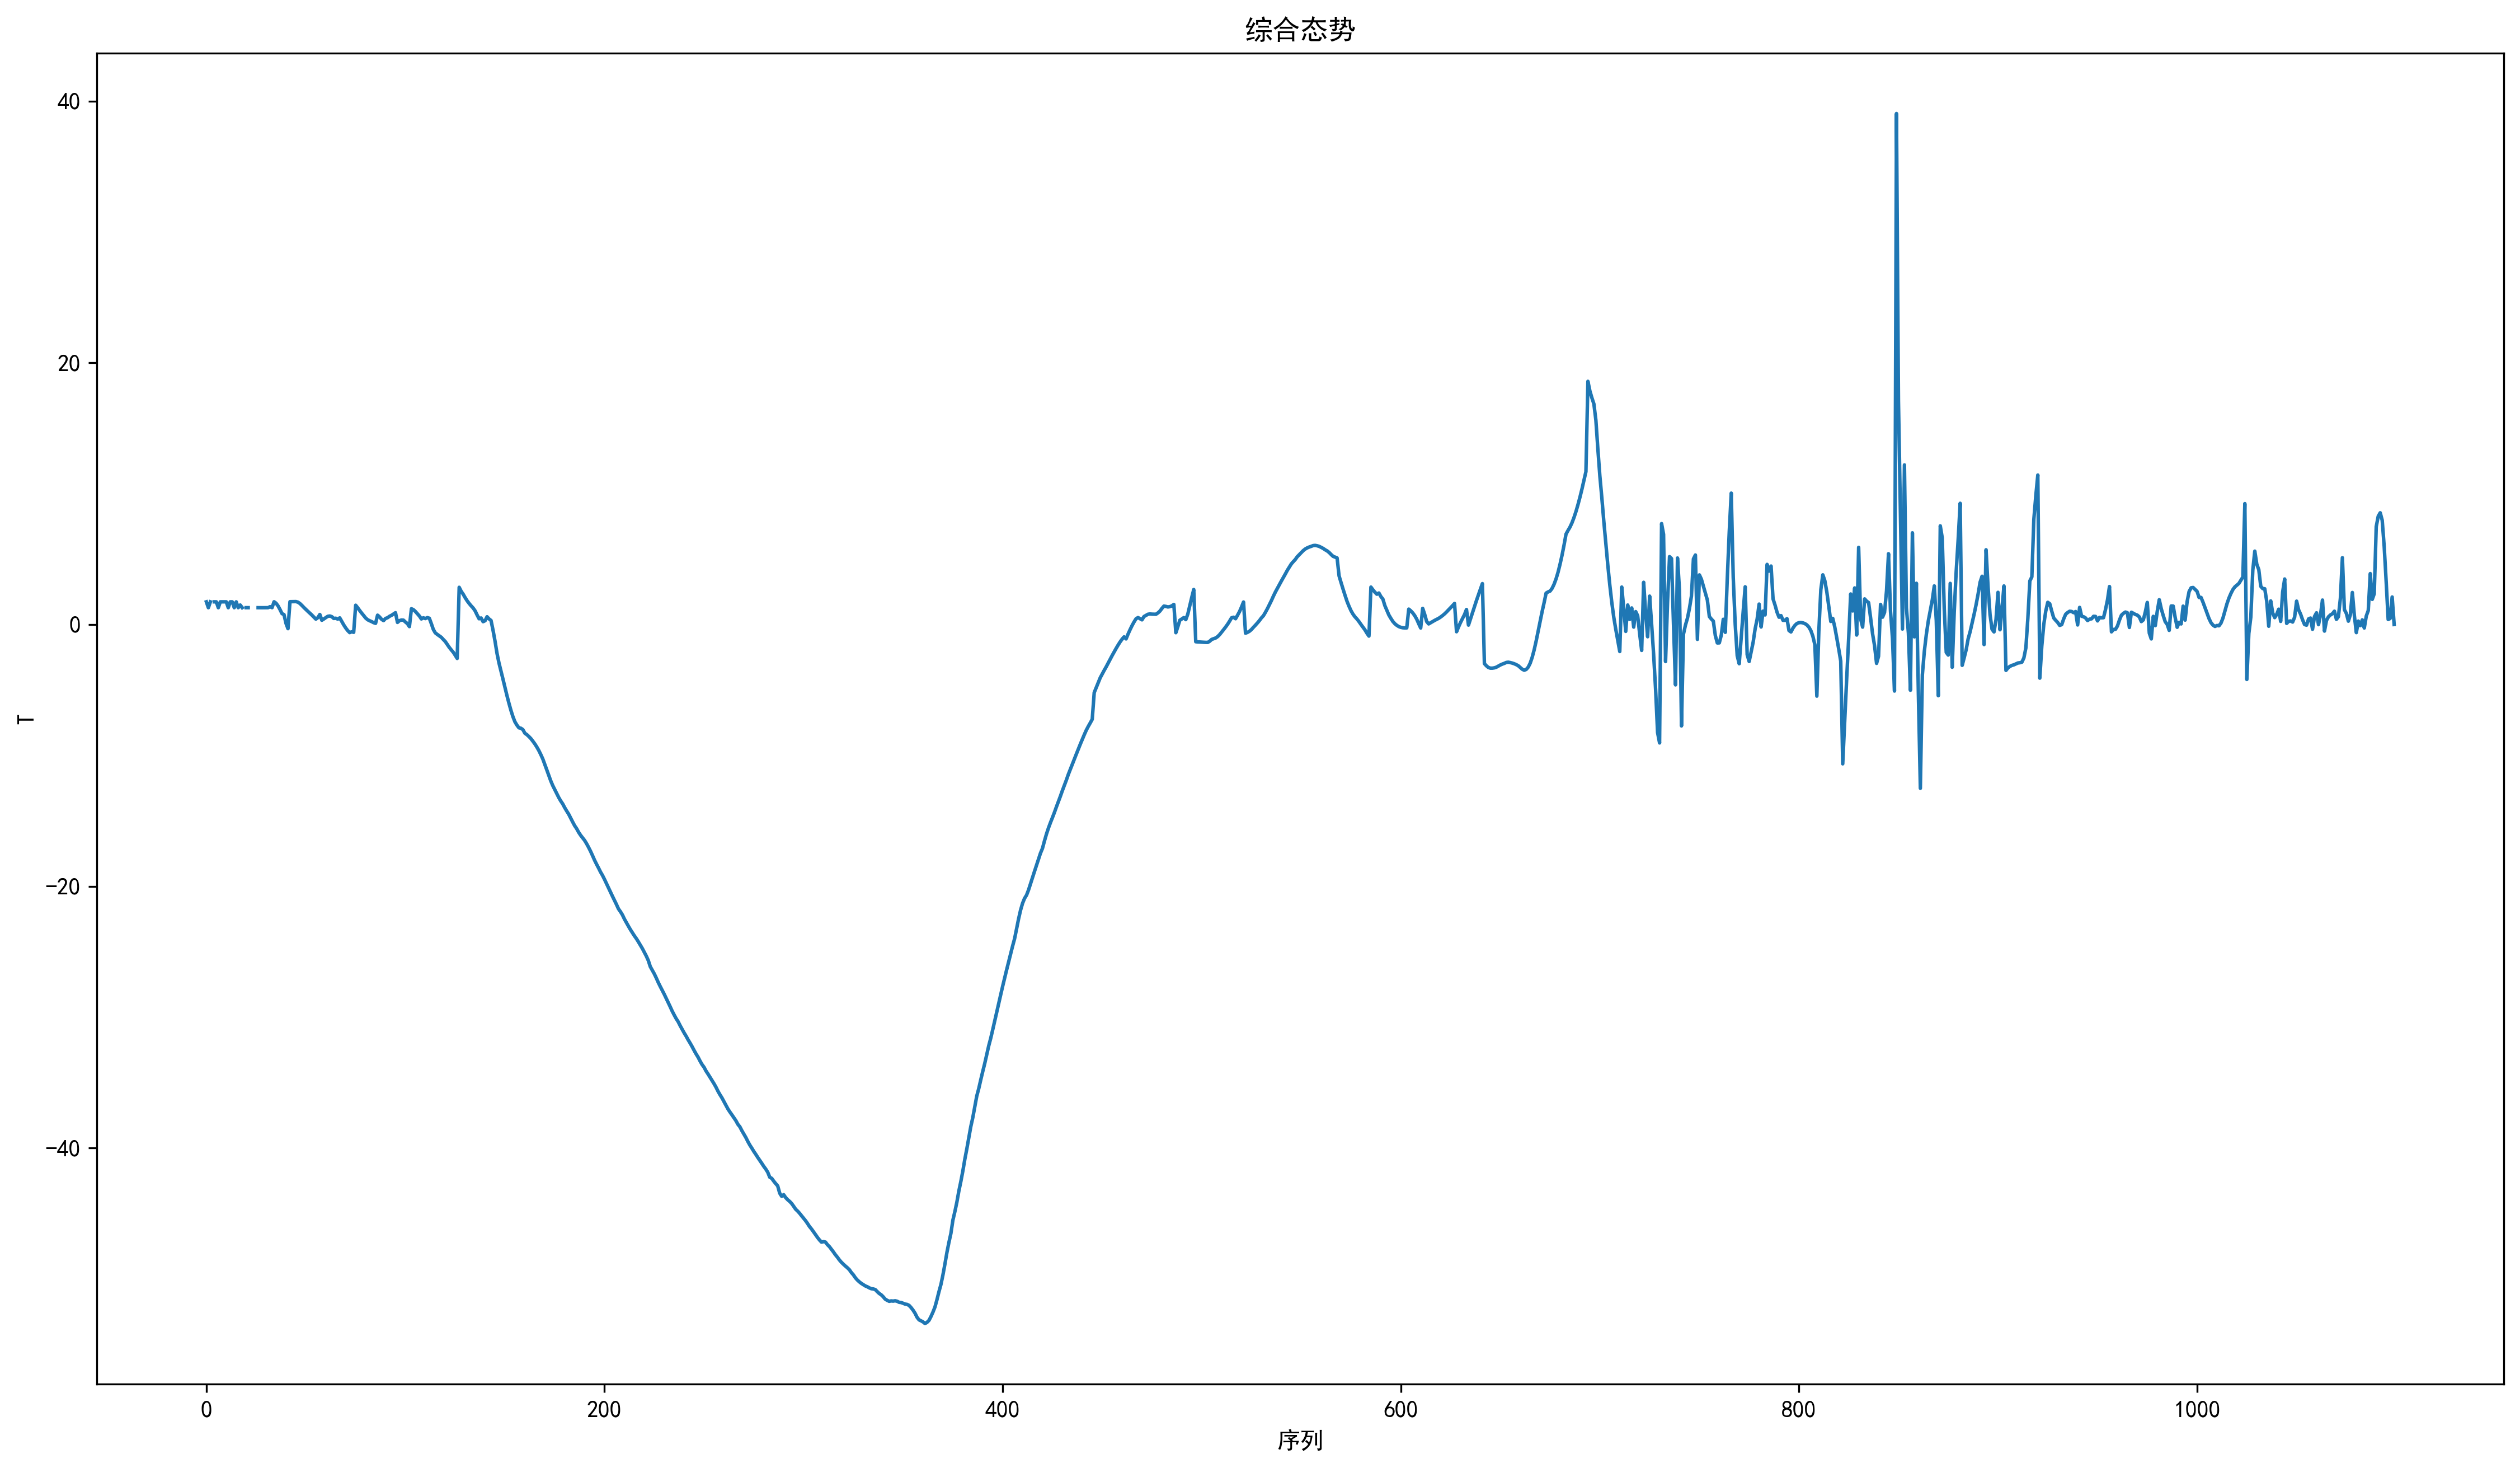

In [68]:
# 绘制T
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T_list)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('序列')
ax.set_ylabel('T')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('综合态势')
# 保存图片
# plt.savefig('./fig/综合态势.png', dpi=300)
plt.show()